# Modelo de Análise Automatizada de Sedentarismo

## Criando a Pasta de Armazanamento

Usando o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/

/content/drive/My Drive


In [ ]:
cd wisdm-dataset/

/content/drive/My Drive/wisdm-dataset


In [ ]:
cd arff_files

/content/drive/My Drive/wisdm-dataset/arff_files


In [ ]:
cd watch

/content/drive/My Drive/wisdm-dataset/arff_files/watch


In [ ]:
cd accel

/content/drive/My Drive/wisdm-dataset/arff_files/watch/accel


### Extensão para ler o DataSet

In [ ]:
pip install arff

  Created wheel for arff: filename=arff-0.9-cp36-none-any.whl size=4970 sha256=64cb6e703d2734524b5cc90283cfe8a2fc1f972fcbdd828bbeaccdc624b307cc
  Stored in directory: /root/.cache/pip/wheels/04/d0/70/2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


##Loading files to a DataFrame

In [ ]:
import pandas as pd
import arff
df_concat = pd.DataFrame()
for i in range(1600,1651):
  file = 'data_{}_accel_watch.arff'.format(i)
  #print(file)
  try:
    data = arff.load(file)
    df = pd.DataFrame(data)
    df_concat = pd.concat([df_concat,df])
  except OSError:
    print("Este arquivo não existe")
df_concat.head()

Este arquivo não existe


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
0,A,0.0,0.0,0.0,0.045,0.090,0.190,0.215,0.210,0.135,0.115,0.260,0.435,0.235,0.060,0.010,0.000,0.0,0.0,0.0,0.0,0.135,0.420,0.335,0.050,0.020,0.02,0.02,0.0,0.0,0.0,12.0689,-1.13570,-0.022859,52.7027,46.3415,44.8837,3.33371,1.87644,2.00437,...,0.618168,0.613121,0.607417,0.601063,0.594066,0.586432,0.393334,0.555961,0.555067,0.553580,0.551500,0.548829,0.545570,0.541727,0.537304,0.532306,0.526738,0.520606,0.513916,0.381289,0.538935,0.538069,0.536627,0.534610,0.532021,0.528862,0.525137,0.520850,0.516005,0.510607,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,1600
1,A,0.0,0.0,0.0,0.000,0.030,0.250,0.305,0.225,0.125,0.065,0.350,0.360,0.260,0.025,0.000,0.005,0.0,0.0,0.0,0.0,0.285,0.440,0.240,0.030,0.005,0.00,0.00,0.0,0.0,0.0,12.1521,-1.75208,-1.327610,39.3750,40.0000,39.1837,2.50595,2.35428,1.67891,...,0.634539,0.629358,0.623504,0.616982,0.609799,0.601963,0.424565,0.600104,0.599140,0.597534,0.595289,0.592406,0.588888,0.584740,0.579966,0.574571,0.568561,0.561942,0.554721,0.375576,0.530860,0.530007,0.528587,0.526600,0.524050,0.520939,0.517269,0.513046,0.508274,0.502957,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,1600
2,A,0.0,0.0,0.0,0.000,0.015,0.280,0.300,0.210,0.140,0.055,0.325,0.445,0.215,0.010,0.005,0.000,0.0,0.0,0.0,0.0,0.170,0.535,0.275,0.020,0.000,0.00,0.00,0.0,0.0,0.0,12.1529,-1.53875,-0.972243,43.4091,37.8846,39.7917,2.45466,1.76268,1.37839,...,0.616762,0.611726,0.606036,0.599696,0.592714,0.585098,0.371445,0.525021,0.524177,0.522773,0.520808,0.518286,0.515208,0.511580,0.507403,0.502683,0.497424,0.491633,0.485316,0.330943,0.467774,0.467023,0.465771,0.464021,0.461773,0.459032,0.455798,0.452077,0.447872,0.443187,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,1600
3,A,0.0,0.0,0.0,0.005,0.070,0.245,0.275,0.220,0.130,0.055,0.280,0.470,0.215,0.030,0.000,0.005,0.0,0.0,0.0,0.0,0.150,0.435,0.380,0.035,0.000,0.00,0.00,0.0,0.0,0.0,11.9523,-1.31171,-0.505159,45.9524,45.0000,38.9796,2.67660,1.68549,1.40901,...,0.613069,0.608064,0.602407,0.596106,0.589166,0.581595,0.376999,0.532871,0.532015,0.530589,0.528596,0.526036,0.522912,0.519229,0.514990,0.510199,0.504862,0.498985,0.492573,0.338095,0.477883,0.477115,0.475837,0.474048,0.471753,0.468952,0.465649,0.461847,0.457550,0.452764,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,1600
4,A,0.0,0.0,0.0,0.000,0.015,0.260,0.325,0.230,0.110,0.060,0.175,0.540,0.250,0.025,0.010,0.000,0.0,0.0,0.0,0.0,0.075,0.405,0.420,0.055,0.045,0.00,0.00,0.0,0.0,0.0,12.0245,-1.03888,0.240671,40.6522,40.8511,45.0000,2.36682,1.54154,1.55086,...,0.595258,0.590398,0.584906,0.578787,0.572049,0.564698,0.357504,0.505316,0.504504,0.503152,0.501261,0.498833,0.495872,0.492379,0.488359,0.483816,0.478755,0.473181,0.467101,0.327375,0.462730,0.461987,0.460749,0.459017,0.456794,0.454082,0.450884,0.447202,0.443042,0.438408,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,1600


In [ ]:
acoes_irrelevantes = ['F','G','H','I','J','K','L','Q','R','S']
for acoes in acoes_irrelevantes:
  df_concat = df_concat[df_concat[0] != acoes]

In [ ]:
df_concat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
0,A,0.0,0.0,0.0,0.045,0.090,0.190,0.215,0.210,0.135,0.115,0.260,0.435,0.235,0.060,0.010,0.000,0.0,0.0,0.0,0.0,0.135,0.420,0.335,0.050,0.020,0.02,0.02,0.0,0.0,0.0,12.0689,-1.13570,-0.022859,52.7027,46.3415,44.8837,3.33371,1.87644,2.00437,...,0.618168,0.613121,0.607417,0.601063,0.594066,0.586432,0.393334,0.555961,0.555067,0.553580,0.551500,0.548829,0.545570,0.541727,0.537304,0.532306,0.526738,0.520606,0.513916,0.381289,0.538935,0.538069,0.536627,0.534610,0.532021,0.528862,0.525137,0.520850,0.516005,0.510607,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,1600
1,A,0.0,0.0,0.0,0.000,0.030,0.250,0.305,0.225,0.125,0.065,0.350,0.360,0.260,0.025,0.000,0.005,0.0,0.0,0.0,0.0,0.285,0.440,0.240,0.030,0.005,0.00,0.00,0.0,0.0,0.0,12.1521,-1.75208,-1.327610,39.3750,40.0000,39.1837,2.50595,2.35428,1.67891,...,0.634539,0.629358,0.623504,0.616982,0.609799,0.601963,0.424565,0.600104,0.599140,0.597534,0.595289,0.592406,0.588888,0.584740,0.579966,0.574571,0.568561,0.561942,0.554721,0.375576,0.530860,0.530007,0.528587,0.526600,0.524050,0.520939,0.517269,0.513046,0.508274,0.502957,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,1600
2,A,0.0,0.0,0.0,0.000,0.015,0.280,0.300,0.210,0.140,0.055,0.325,0.445,0.215,0.010,0.005,0.000,0.0,0.0,0.0,0.0,0.170,0.535,0.275,0.020,0.000,0.00,0.00,0.0,0.0,0.0,12.1529,-1.53875,-0.972243,43.4091,37.8846,39.7917,2.45466,1.76268,1.37839,...,0.616762,0.611726,0.606036,0.599696,0.592714,0.585098,0.371445,0.525021,0.524177,0.522773,0.520808,0.518286,0.515208,0.511580,0.507403,0.502683,0.497424,0.491633,0.485316,0.330943,0.467774,0.467023,0.465771,0.464021,0.461773,0.459032,0.455798,0.452077,0.447872,0.443187,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,1600
3,A,0.0,0.0,0.0,0.005,0.070,0.245,0.275,0.220,0.130,0.055,0.280,0.470,0.215,0.030,0.000,0.005,0.0,0.0,0.0,0.0,0.150,0.435,0.380,0.035,0.000,0.00,0.00,0.0,0.0,0.0,11.9523,-1.31171,-0.505159,45.9524,45.0000,38.9796,2.67660,1.68549,1.40901,...,0.613069,0.608064,0.602407,0.596106,0.589166,0.581595,0.376999,0.532871,0.532015,0.530589,0.528596,0.526036,0.522912,0.519229,0.514990,0.510199,0.504862,0.498985,0.492573,0.338095,0.477883,0.477115,0.475837,0.474048,0.471753,0.468952,0.465649,0.461847,0.457550,0.452764,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,1600
4,A,0.0,0.0,0.0,0.000,0.015,0.260,0.325,0.230,0.110,0.060,0.175,0.540,0.250,0.025,0.010,0.000,0.0,0.0,0.0,0.0,0.075,0.405,0.420,0.055,0.045,0.00,0.00,0.0,0.0,0.0,12.0245,-1.03888,0.240671,40.6522,40.8511,45.0000,2.36682,1.54154,1.55086,...,0.595258,0.590398,0.584906,0.578787,0.572049,0.564698,0.357504,0.505316,0.504504,0.503152,0.501261,0.498833,0.495872,0.492379,0.488359,0.483816,0.478755,0.473181,0.467101,0.327375,0.462730,0.461987,0.460749,0.459017,0.456794,0.454082,0.450884,0.447202,0.443042,0.438408,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,1600


In [ ]:
df_concat = df_concat.replace('A','CAMINHADA')
df_concat = df_concat.replace('B','MODERADA')
df_concat = df_concat.replace('C','MODERADA')

In [ ]:
df_concat = df_concat.replace('M','VIGOROSA')
df_concat = df_concat.replace('O','VIGOROSA')
df_concat = df_concat.replace('P','VIGOROSA')

In [ ]:
df_concat = df_concat.replace('D','INATIVO')
df_concat = df_concat.replace('E','INATIVO')

##Frequencia das atividades

In [ ]:
'''cont_MODERADA=0
cont_INATIVO=0
cont_VIGORASA=0
cont_CAMINHADA = 0

for i in range(0,df_concat.shape[0]):
  if(df_concat.iloc[i,0]=='MODERADA'):
    cont_MODERADA+=1
  if(df_concat.iloc[i,0]=='INATIVO'):
    cont_INATIVO+=1
  if(df_concat.iloc[i,0]=='VIGOROSA'):
    cont_VIGORASA+=1
  if(df_concat.iloc[i,0]=='CAMINHADA'):
    cont_CAMINHADA+=1'''

#SUGESTAO
cont_MODERADA  = len(df_concat[df_concat[0] == 'MODERADA'][0])
cont_INATIVO   = len(df_concat[df_concat[0] == 'INATIVO'][0])
cont_VIGORASA  = len(df_concat[df_concat[0] == 'VIGOROSA'][0])
cont_CAMINHADA = len(df_concat[df_concat[0] == 'CAMINHADA'][0])


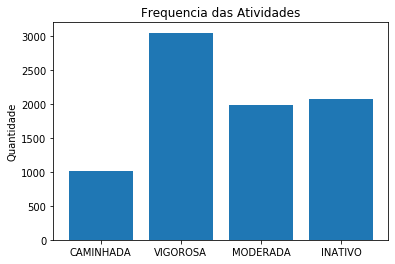

In [ ]:
import matplotlib.pyplot as plt

activity = ["CAMINHADA","VIGOROSA","MODERADA","INATIVO"]
y_pos = [cont_CAMINHADA,cont_VIGORASA,cont_MODERADA,cont_INATIVO]

plt.bar(activity,y_pos)
plt.xticks(activity)
plt.ylabel('Quantidade')
plt.title("Frequencia das Atividades")
plt.show()

In [ ]:
#Inicialização dos vetores para as acurácias e erros
vector_plot =[]
vector_plot_error=[]
vector_training=['Random Forest','Random Forest + SelectKBest_75','Random Forest + PCA','Neural Network','Neural Network + SelectKBest_75','Neural Network + PCA']

##Agrupando ações relevantes

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
#É preciso fazer one hot encoding antes de fazer o one hot enconding do Keras (por que deus???)
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df_concat[0]= le.fit_transform(df_concat[0])

##Sem Seleção de Atributos

###Matriz Confusão da Random Forest sem Seleção de Atributos

In [ ]:
df_values = df_concat.drop(columns=0)
df_target = df_concat[0]
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)

In [ ]:
random_forest  = RandomForestClassifier()
random_forest = random_forest.fit(X_train, y_train)
y_predit = random_forest.predict(X_test)
cm = confusion_matrix(y_test,y_predit)

[[220   1  25  16]
 [  0 479   2  10]
 [ 16   1 449  25]
 [  3   6  21 758]]


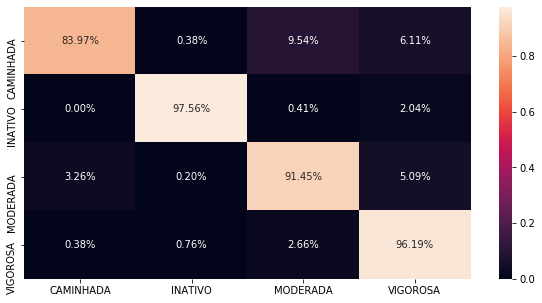

In [ ]:
index = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
columns = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
#Porque este cm_matrix ta aqui
cm_matrix = confusion_matrix(y_test,y_predit)
#print(cm_matrix)
#cm = pd.DataFrame(cm_matrix,index,columns)
print(cm)
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm_df = pd.DataFrame(cm,index,columns)                    
plt.figure(figsize=(10,5))  
sns.heatmap(cm_df, annot=True,fmt=".2%")

In [ ]:
#precisão
precisao_inativo = cm_matrix[0][0]/(cm_matrix[0][0]+cm_matrix[0][1]+cm_matrix[0][2])
precisao_moderada = cm_matrix[1][1]/(cm_matrix[1][0]+cm_matrix[1][1]+cm_matrix[1][2])
precisao_vigorosa = cm_matrix[2][2]/(cm_matrix[2][0]+cm_matrix[2][1]+cm_matrix[2][2])
#Sensibilidade
sensibilidade_inativo = cm_matrix[0][0]/(cm_matrix[0][0]+cm_matrix[1][0]+cm_matrix[2][0])
sensibilidade_moderada = cm_matrix[1][1]/(cm_matrix[0][1]+cm_matrix[1][1]+cm_matrix[2][1])
sensibilidade_vigorosa = cm_matrix[2][2]/(cm_matrix[0][2]+cm_matrix[1][2]+cm_matrix[2][2])

##Random Forest KFold Sem Seleção de Atributos

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
df_values = df_concat.drop(columns=0)
df_target = df_concat[0]
groups = df_concat[92] #ids
scores = cross_val_score(RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1,criterion='entropy'), df_values, df_target, cv=49,scoring="accuracy",groups=groups)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
vector_plot.append(scores.mean())
vector_plot_error.append(scores.std())

In [ ]:
import matplotlib.pyplot as plt

plt.bar(vet,vet_aux)
plt.xticks(vet)
plt.ylabel('Acuracia')
plt.title("Frequencia das Acurácias")
plt.show()


#Matriz Confusão da Rede Neural Sem Seleção de Atributos

In [ ]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import LabelEncoder 
from keras.utils import to_categorical
import keras
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#One hot encoding
df_values = df_concat.drop(columns=0)
df_target = df_concat[0]
#print(df_target)
df_target = to_categorical(df_target)# split into input (X) and output (Y) variables
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)
# create model
model = Sequential()
model.add(Dense(92, input_dim=92, init= 'uniform', activation='sigmoid'))
model.add(Dense(4,activation='softmax'))


# Compile model
model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, nb_epoch=50, batch_size=64, validation_data = (X_test,y_test))
# evaluate the model
#scores = model.evaluate(X, Y)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
y_predict = model.predict_classes(X_test)
from numpy import argmax
y_test_labled = []
for i in range (len(y_test)):
  y_test_labled.append(argmax(y_test[i]))
cm = confusion_matrix(y_test_labled,y_predit)

In [ ]:
index = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
columns = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
cm_matrix = confusion_matrix(y_test_labled,y_predit)
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm = pd.DataFrame(cm,index,columns)                      
plt.figure(figsize=(10,5))  
sns.heatmap(cm, annot=True,fmt=".2%")

#Rede Neural KFold Sem Seleção de Atributos

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from itertools import product
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import LabelEncoder 
from keras.utils.np_utils import to_categorical
import keras
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
#Validação cruzada separando por indivíduo -- Sugestão da equipe MJV
groups = df_concat[92] #ids
df_values = df_concat.drop(columns=0)
df_values_np =df_values.to_numpy()
df_target = df_concat[0]

gkf = GroupKFold(n_splits=49)
cvscores = []
for train, test in gkf.split(df_values, df_target, groups=groups):
  model = Sequential()
  model.add(Dense(92, input_dim=92, init= 'uniform', activation='sigmoid'))
  model.add(Dense(4,activation='softmax'))
  df_target_categorial = to_categorical(df_target)# split into input (X) and output (Y) variables
  print(len(df_target_categorial[0]))

  # Compile model
  model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
  # Fit the model
  model.fit(df_values_np[train], df_target_categorial[train], nb_epoch=50, batch_size=64)
  # evaluate the model
  scores = model.evaluate(df_values_np[test], df_target_categorial[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))
  cvscores.append(scores[1])

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
vector_plot.append(numpy.mean(cvscores))
vector_plot_error.append(numpy.std(cvscores))

#SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
#É preciso fazer one hot encoding antes de fazer o one hot enconding do Keras (por que deus???)
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df_concat[0]= le.fit_transform(df_concat[0])

In [ ]:
df_values = df_concat.drop(columns=0)
df_target = df_concat[0]
print(df_target)
df_concat_new = SelectKBest(mutual_info_classif, k=75).fit_transform(df_values, df_target)
df_concat_kbest = pd.DataFrame(df_concat_new)

#Matriz confusão RandomForest com SelectKBest

In [ ]:
df_values = df_concat_kbest.drop(columns=0)
df_target = df_concat[0]
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)

In [ ]:
random_forest  = RandomForestClassifier()
random_forest = random_forest.fit(X_train, y_train)
y_predit = random_forest.predict(X_test)
cm = confusion_matrix(y_test,y_predit)

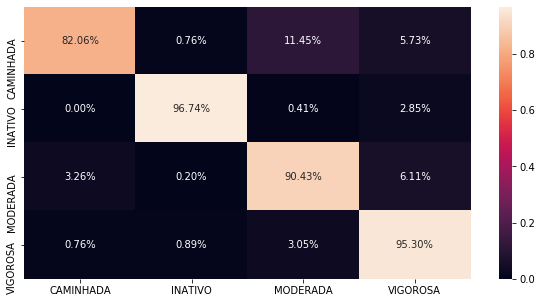

In [ ]:
index = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
columns = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
cm_matrix = confusion_matrix(y_test,y_predit)
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm = pd.DataFrame(cm,index,columns)                      
plt.figure(figsize=(10,5))  
sns.heatmap(cm, annot=True,fmt=".2%")

In [ ]:
#precisão
precisao_inativo = cm_matrix[0][0]/(cm_matrix[0][0]+cm_matrix[0][1]+cm_matrix[0][2])
precisao_moderada = cm_matrix[1][1]/(cm_matrix[1][0]+cm_matrix[1][1]+cm_matrix[1][2])
precisao_vigorosa = cm_matrix[2][2]/(cm_matrix[2][0]+cm_matrix[2][1]+cm_matrix[2][2])
#Sensibilidade
sensibilidade_inativo = cm_matrix[0][0]/(cm_matrix[0][0]+cm_matrix[1][0]+cm_matrix[2][0])
sensibilidade_moderada = cm_matrix[1][1]/(cm_matrix[0][1]+cm_matrix[1][1]+cm_matrix[2][1])
sensibilidade_vigorosa = cm_matrix[2][2]/(cm_matrix[0][2]+cm_matrix[1][2]+cm_matrix[2][2])

#Random Forest KFold com SelectKBest


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
df_values = df_concat_kbest.drop(columns=0)
df_target = df_concat[0]
scores = cross_val_score(RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1,criterion='entropy'), df_values, df_target, cv=49,scoring="accuracy")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
vector_plot.append(scores.mean())
vector_plot_error.append(scores.std())

Accuracy: 0.82 (+/- 0.08)


#Matriz Confusão da Rede Neural com SelectKBest

In [ ]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import LabelEncoder 
from keras.utils import to_categorical
import keras
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#One hot encoding
df_values = df_concat_kbest.drop(columns=0)
df_target = df_concat[0]
#print(df_target)
df_target = to_categorical(df_target)# split into input (X) and output (Y) variables
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)
# create model
model = Sequential()
model.add(Dense(92, input_dim=74, init= 'uniform', activation='sigmoid'))
model.add(Dense(4,activation='softmax'))


# Compile model
model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, nb_epoch=50, batch_size=64, validation_data = (X_test,y_test))
# evaluate the model
#scores = model.evaluate(X, Y)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
y_predict = model.predict_classes(X_test)
from numpy import argmax
y_test_labled = []
for i in range (len(y_test)):
  y_test_labled.append(argmax(y_test[i]))
cm = confusion_matrix(y_test_labled,y_predit)

In [ ]:
index = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
columns = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
cm_matrix = confusion_matrix(y_test_labled,y_predit)
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm = pd.DataFrame(cm,index,columns)                      
plt.figure(figsize=(10,5))  
sns.heatmap(cm, annot=True,fmt=".2%")

#Rede neural com SelecKBest e cross-validation



In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from itertools import product
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import LabelEncoder 
from keras.utils.np_utils import to_categorical
import keras
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold

#Validação cruzada separando por indivíduo -- Sugestão da equipe MJV
groups = df_concat[92] #ids
df_values = df_concat_kbest.drop(columns=0)
df_values_np =df_values.to_numpy()
df_target = df_concat[0]

gkf = GroupKFold(n_splits=49)
cvscores = []
for train, test in gkf.split(df_values, df_target, groups=groups):
  model = Sequential()
  model.add(Dense(92, input_dim=74, init= 'uniform', activation='sigmoid'))
  model.add(Dense(4,activation='softmax'))
  df_target_categorial = to_categorical(df_target)# split into input (X) and output (Y) variables
  print(len(df_target_categorial[0]))

  # Compile model
  model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
  # Fit the model
  model.fit(df_values_np[train], df_target_categorial[train], nb_epoch=50, batch_size=64)
  # evaluate the model
  scores = model.evaluate(df_values_np[test], df_target_categorial[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))
  cvscores.append(scores[1] )

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
vector_plot.append(numpy.mean(cvscores))
vector_plot_error.append(numpy.std(cvscores))

#PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df_concat[0]= le.fit_transform(df_concat[0])
df_values = df_concat.drop(columns=0)
df_target = df_concat[0]
#df_simulation[0]= le.fit_transform(df_simulation[0])
#df_values = df_simulation.drop(columns=0)
#df_target_simulation = df_simulation[0]

pca = PCA(n_components = 16,svd_solver = 'full')
pca.fit(df_concat)
df_concat_pca = pca.transform(df_concat)
df_concat_pca = pd.DataFrame(df_concat_pca)
df_concat_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-6.988113,24.819618,-8.519803,-2.960030,-6.852361,1.725999,0.542788,1.231086,1.713754,0.182250,1.327686,-0.766976,-0.032895,0.587803,0.232022,-0.506493
1,-22.057828,20.599936,-9.416219,-2.484835,-7.276228,-0.163177,-1.168720,1.631094,1.998170,0.028084,0.738263,-0.188410,0.444639,0.466810,0.140047,-0.628853
2,-19.978031,22.674513,-6.118909,-1.302239,-6.885103,0.688408,-1.079620,1.498444,2.083121,0.234037,0.753383,-0.441616,0.252893,0.513846,-0.020667,-0.414094
3,-15.020522,22.010286,-8.916870,-6.078782,-7.296095,1.932581,-0.390878,1.417879,1.600820,0.180724,1.047509,-0.563341,0.059793,0.509543,0.130020,-0.399357
4,-18.486451,21.251272,-11.549467,1.760540,-6.785127,1.204353,0.303330,1.173929,1.872158,0.126026,0.966464,-0.520213,-0.305534,0.639661,0.105778,-0.472268


[0, 47.1, 66.6, 82.32, 92.6, 95.55, 97.54, 98.57, 99.49, 99.62, 99.72, 99.78, 99.82, 99.86, 99.89, 99.91, 99.92, 99.93, 99.95, 99.96, 99.96, 99.97, 99.98, 99.98, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
PCA Score is 47.1 using 1 components
PCA Score is 82.32 using 3 components
PCA Score is 92.6 using 4 components
PCA Score is 95.55 using 5 components
PCA Score is 97.54 using 6 components


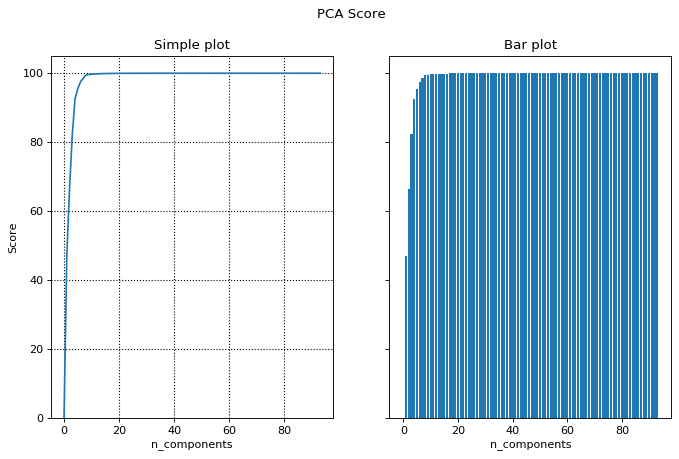

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(svd_solver='full', n_components = df_concat.shape[1])
pca.fit(df_concat)

pca_sum_score = [(round(sum(pca.explained_variance_ratio_[0:n])*100,2)) for n in range(pca.n_components+1)]

fig4, ax4 = plt.subplots(1, 2, figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k', sharey=True)
fig4.suptitle('PCA Score') # or plt.suptitle('Main title')
ax4[0].plot(pca_sum_score)
ax4[0].title.set_text('Simple plot')
ax4[0].set_xlabel('n_components')
ax4[0].set_ylabel('Score')
ax4[0].grid(color='k', linestyle=':', linewidth=1)

ax4[1].bar(np.arange(pca.n_components+1),pca_sum_score)
ax4[1].title.set_text('Bar plot')
ax4[1].set_xlabel('n_components')

print(pca_sum_score)

pca_threshold = [50,75,90,95,97]

for threshold in pca_threshold:
    print("PCA Score is {} using {} components".format(min(pca_sum_score, key=lambda x:abs(x-threshold)),pca_sum_score.index(min(pca_sum_score, key=lambda x:abs(x-threshold)))))


#Random forest com PCA e cross-validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

df_values = df_concat_pca.drop(columns=0)
df_target = df_concat[0]
scores = cross_val_score(RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1,criterion='entropy'), df_values, df_target, cv=10,scoring="accuracy")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
vector_plot.append(scores.mean())
vector_plot_error.append(scores.std())

Accuracy: 0.94 (+/- 0.02)


NameError: ignored

#Matriz Confusão da RandomForest com PCA

In [ ]:
df_values = df_concat_pca.drop(columns=0)
df_target = df_concat[0]
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)

NameError: ignored

In [ ]:
random_forest  = RandomForestClassifier()
random_forest = random_forest.fit(X_train, y_train)
y_predit = random_forest.predict(X_test)
cm = confusion_matrix(y_test,y_predit)

NameError: ignored

In [ ]:
index = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
columns = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
cm_matrix = confusion_matrix(y_test,y_predit)
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm = pd.DataFrame(cm,index,columns)                      
plt.figure(figsize=(10,5))  
sns.heatmap(cm, annot=True,fmt=".2%")

#Matriz Confusão da Rede Neural com PCA

In [ ]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder 
from keras.utils import to_categorical
import keras
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#One hot encoding
df_values = df_concat_pca.drop(columns=0)
df_target = df_concat[0]
#print(df_target)
df_target = to_categorical(df_target)# split into input (X) and output (Y) variables
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, random_state=0)
# create model
model = Sequential()
model.add(Dense(92, input_dim=15, init= 'uniform', activation='sigmoid'))
model.add(Dense(4,activation='softmax'))


# Compile model
model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, nb_epoch=50, batch_size=64, validation_data = (X_test,y_test))
# evaluate the model
#scores = model.evaluate(X, Y)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(92, input_dim=15, activation="sigmoid", kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 6094 samples, validate on 2032 samples
Epoch 1/50





6094/6094 [==============================] - 1s 122us/step - loss: 0.5140 - acc: 0.5760 - val_loss: 0.4658 - val_acc: 0.7023
Epoch 2/50
6094/6094 [==============================] - 0s 26us/step - loss: 0.4441 - acc: 0.7383 - val_loss: 0.4122 - val_acc: 0.8066
Epoch 3/50
6094/6094 [==============================] - 0s 24us/step - loss: 0.3961 - acc: 0.8310 - val_loss: 0.3709 - val_acc: 0.8652
Epoch 4/50
6094/6094 [==============================] - 0s 26us/step - loss: 0.3598 - acc: 0.8823 - val_loss: 0.3412 - val_acc: 0.9154
Epoch 5/50
6094/6094 [==============================] - 0s 23us/step - loss: 0.3344 - acc: 0.9189 - val_loss: 0.3218 - val_acc: 0.9434
Epoch 6/50
6094/6094 [==============================] - 0s 28us/step - loss: 0.3171 - acc: 0.9393 - val_loss: 0.3073 - val_acc: 0.9582
Epoch 7/50
6094/6094 [==============================] - 0s 23us/step - loss: 0.3053 - acc: 0.9529 - val_loss: 0.2975 - val_acc: 0.967

In [ ]:
y_predict = model.predict_classes(X_test)
from numpy import argmax
y_test_labled = []
for i in range (len(y_test)):
  y_test_labled.append(argmax(y_test[i]))
cm = confusion_matrix(y_test_labled,y_predit)

NameError: ignored

In [ ]:
index = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
columns = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
cm_matrix = confusion_matrix(y_test_labled,y_predit)
cm = [[j/sum(i) for j in i] for i in cm] #transformando em porcentagem 
cm = pd.DataFrame(cm,index,columns)                      
plt.figure(figsize=(10,5))  
sns.heatmap(cm, annot=True,fmt=".2%")

NameError: ignored

In [ ]:
#precisão
precisao_inativo = cm_matrix[0][0]/(cm_matrix[0][0]+cm_matrix[0][1]+cm_matrix[0][2])
precisao_moderada = cm_matrix[1][1]/(cm_matrix[1][0]+cm_matrix[1][1]+cm_matrix[1][2])
precisao_vigorosa = cm_matrix[2][2]/(cm_matrix[2][0]+cm_matrix[2][1]+cm_matrix[2][2])
#Sensibilidade
sensibilidade_inativo = cm_matrix[0][0]/(cm_matrix[0][0]+cm_matrix[1][0]+cm_matrix[2][0])
sensibilidade_moderada = cm_matrix[1][1]/(cm_matrix[0][1]+cm_matrix[1][1]+cm_matrix[2][1])
sensibilidade_vigorosa = cm_matrix[2][2]/(cm_matrix[0][2]+cm_matrix[1][2]+cm_matrix[2][2])

#Rede Neural com PCA e Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from itertools import product
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import LabelEncoder 
from keras.utils.np_utils import to_categorical
import keras
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold

df_values = df_concat_pca.drop(columns=0)
df_values_np =df_values.to_numpy()
df_target = df_concat[0]
#Validação cruzada separando por indivíduo -- Sugestão da equipe MJV
groups = df_concat[92] #ids
df_values = df_concat_pca.drop(columns=0)
df_values_np =df_values.to_numpy()
df_target = df_concat[0]

gkf = GroupKFold(n_splits=10)
cvscores = []
for train, test in gkf.split(df_values, df_target, groups=groups):
  model = Sequential()
  model.add(Dense(92, input_dim=15, init= 'uniform', activation='sigmoid'))
  model.add(Dense(4,activation='softmax'))
  df_target_categorial = to_categorical(df_target)
  print(len(df_target_categorial[0]))

  # Compile model
  model.compile(loss='poisson',optimizer='adam', metrics=['accuracy'])
  # Fit the model
  model.fit(df_values_np[train], df_target_categorial[train], nb_epoch=50, batch_size=64)
  # evaluate the model
  scores = model.evaluate(df_values_np[test], df_target_categorial[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))
  cvscores.append(scores[1])

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
vector_plot.append(numpy.mean(cvscores))
vector_plot_error.append(numpy.std(cvscores))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(92, input_dim=15, activation="sigmoid", kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


4
Epoch 1/50
7336/7336 [==============================] - 0s 44us/step - loss: 0.5021 - acc: 0.6076
Epoch 2/50
7336/7336 [==============================] - 0s 20us/step - loss: 0.4283 - acc: 0.7627
Epoch 3/50
7336/7336 [==============================] - 0s 19us/step - loss: 0.3780 - acc: 0.8555
Epoch 4/50
7336/7336 [==============================] - 0s 19us/step - loss: 0.3422 - acc: 0.9122
Epoch 5/50
7336/7336 [==============================] - 0s 19us/step - loss: 0.3190 - acc: 0.9426
Epoch 6/50
7336/7336 [==============================] - 0s 20us/step - loss: 0.3040 - acc: 0.9565
Epoch 7/50
7336/7336 [==============================] - 0s 20us/step - loss: 0.2941 - acc: 0.9643
Epoch 8/50
7336/7336 [==============================] - 0s 19us/step - loss: 0.2871 - acc: 0.9712
Epoch 9/50
7336/7336 [==============================] - 0s 19us/step - loss: 0.2820 - acc: 0.9748
Epoch 10/50
7336/7336 [==============================] - 0s 19us/step - loss: 0.2782 - acc: 0.9759
Epoch 11/50
7336/

NameError: ignored

#Tipos de treinamento e suas respectivas acurácias

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



plt.barh(vector_training,vector_plot,color='red',xerr = vector_plot_error, edgecolor='black',)
plt.ylabel('Processos de Treinamento')
plt.xlabel('Accuracy')
plt.title('Processos vs Acurácia')
plt.show()


## Classificador de Sedentarismo

### Contador de Constância 

Verifica quantas vezes a pessoa fez alguma atividade em um período contínuo de, no mínimo, 10 minutos.

Recebe 7 arquivos do **Classificador de Ações**, em que cada um representa uma lista  de ações detectadas em *1 dia* e em que cada ação representa *10 segundos* daquela atividade.

Por exemplo, uma lista como:

`['INATIVO','INATIVO','MODERADA','VIGOROSA','MODERADA',..., 'INATIVO']`

Retorna uma lista de sub-listas, em que cada sublista representa um dia. Cada sub-lista é uma lista de tuplas, em que cada tupla representa um período de atividade contínua de alguma ação. O primeiro elemento da tupla é a string da ação e o segundo elemento é o tempo, em minutos, que aquela ação foi realizada de forma contínua (com uma certa tolerância). 

Por exemplo, *retorna* :

`[list_dia1,list_dia2, ... ,list_dia7]`

em que cada lista está no seguinte modelo,

`list_dia1 = [('INATIVO',37.2),('MODERADA',15),('INATIVO',120.2)]`


In [ ]:
import csv
import pandas as pd
#import numpy as np

In [ ]:
file_name = 'lista_de_acoes.csv'
delimiter = ';'
big_window = 60 #10 minutes
time_element = 10 #seconds
classes = ['CAMINHADA','INATIVO','MODERADA','VIGOROSA']
asserts = [0.94,0.95,0.9,0.96] #Accuracy of each class in the Stock Classifier model

In [ ]:
def csv_from_list(file_name):
  with open(file_name) as csv_file:
    csv_reader = csv.reader(csv_file,delimiter=delimiter)
    l = list(csv_reader)
    return l


def occurrences(period, classes):
  n_class = len(classes)
  n_period = len(period)
  occ = [0] * n_class

  for i in range(n_period):
    try:
      ind = classes.index(period[i])
      occ[ind] += 1
    except ValueError:
      pass
  return occ


def occurrences_update(occ_old, period_old, period_new, classes,n_terms_new=1):
  occ_new = occ_old[:]
  N = len(period_new)
  for i in range(n_terms_new):
    try:
      ind = classes.index(period_old[i])
      occ_new[ind] -= 1
    except ValueError:
      pass
  
  for i in range(N-n_terms_new,N):
    try:
      ind = classes.index(period_new[i])
      occ_new[ind] += 1
    except ValueError:
      pass

  return occ_new


def class_prediminantly(occ,classes,ret_ind_rel=False):
  cddt = max(occ) #relevance candidate
  
  ind_rel = occ.index(cddt)

  if ret_ind_rel:
    return classes[ind_rel], ind_rel

  else:
    return classes[ind_rel]


def relevant(occurrences,classes,asserts):
  occ = occurrences
  n = sum(occ)
  cddt = max(occ) #relevance candidate
  
  class_rel,ind_rel = class_prediminantly(occ,classes,ret_ind_rel=True)
  
  rel_min = int(asserts[ind_rel] * n)

  #rel = False

  if cddt >= rel_min:
    return class_rel

  else:
    return 0


def interval_div(l):
  ls = []
  n = len(l)
  i = 1
  l_aux = [l[0]]
  while i < n:
    if l[i] == l[i-1]+1:
      l_aux.append(l[i])
    else:
      ls.append(l_aux)
      l_aux = [l[i]]
    
    i+=1
  ls.append(l_aux)
  return ls


def list_index_for_blocks(l,l_inds,big_window,time_element):
  n_blk = len(l_inds)
  blks = []
  for i_blk in range(n_blk):
    inds = l_inds[i_blk]
    i0 = inds[0]
    blk = l[i0:i0+big_window]

    for i in inds[1:]:
      blk.append(l[i+big_window])
    
    blks.append(blk)

  return blks


def blocks_and_times(rough_blks,time_element,classes,asserts):
  n_blks = len(rough_blks)
  blks = []
  for i in range(n_blks):
    r_blk = rough_blks[i]
    n_blk = len(r_blk)
    occ = occurrences(r_blk,classes)
    clss = class_prediminantly(occ,classes)

    t_blk = time_element*max(occ)

    blks.append((clss,t_blk/60))

  return blks

def one_day_cont(day_list, classes, big_window, asserts,time_element):
  "Analyzes a one-day dataset."
  N = len(day_list)
  n_class = len(classes)
  period_0 = day_list[:big_window]
  n_terms_new = 1

  inds_rel = []
  rels = []

  for i in range(N-big_window):
    period = day_list[i:i+big_window]

    if i == 0:
      occ = occurrences(period_0,classes)
    else:
      occ = occurrences_update(occ_old,period_old,period,classes,n_terms_new)
    
    rel = relevant(occ,classes,asserts)
    if rel:
      inds_rel.append(i)
      rels.append(rel)

    occ_old = occ
    period_old = period    

  inds_blocks = interval_div(inds_rel)
  rough_blks = list_index_for_blocks(day_list,inds_blocks,big_window,time_element)

  blocks = blocks_and_times(rough_blks,time_element,classes,asserts)

  return blocks

## Testes

Importando arquivo teste gerado aleatoriamente com apenas 60 strings respectivamente iguais.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/pessoa-poli/MJVictory/master/lista_de_acoes.csv"
df1 = pd.read_csv(url, header=None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,...,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA


In [ ]:
day_test = list(df1.iloc[0,:])

In [ ]:
result = one_day_cont(day_test,classes,big_window,asserts,time_element)

In [ ]:
result

[('INATIVO', 106.0),
 ('VIGOROSA', 14.833333333333334),
 ('INATIVO', 30.333333333333332),
 ('VIGOROSA', 14.833333333333334)]

In [ ]:
url2 = "https://raw.githubusercontent.com/pessoa-poli/MJVictory/master/lista_de_acoes.csv"
df2 = pd.read_csv(url2, header=None)
print(df2.count(axis=1))
df2

0    1000
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,INATIVO,...,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA,VIGOROSA


In [ ]:
day_test2 = list(df2.iloc[0,:])

In [ ]:
i= 0
for e in day_test2:
  if e == 'INATIVO':
    i+=1
i

820

In [ ]:
result2 = one_day_cont(day_test2,classes,big_window,asserts,time_element)

In [ ]:
result2

[('INATIVO', 106.0),
 ('VIGOROSA', 14.833333333333334),
 ('INATIVO', 30.333333333333332),
 ('VIGOROSA', 14.833333333333334)]

#Classificação de pessoas em níveis de Sedentarismo com base no Tipo de Ação



> Casos de Teste



In [ ]:
#Casos de Uso para cada classe de sedentarismo
pessoa_sedentario = [[('INATIVO',11.5),('INATIVO',15.5)],[],[('INATIVO',21.5),('INATIVO',10.5)],[('INATIVO',21.5),('INATIVO',10.5)],[('INATIVO',21.5),('INATIVO',10.5)],[('INATIVO',21.5),('INATIVO',10.5)],[('INATIVO',21.5),('INATIVO',10.5)]]
pessoa_muitoAtivo = [
                     [('VIGOROSA',10.5),('CAMINHADA',30.5),('INATIVO',11.5),('INATIVO',11.5)], #cada linha representa um dia.
                     [],
                     [('VIGOROSA',30.5),('CAMINHADA',30.5),('INATIVO',21.5),('INATIVO',10.5)],
                     [('VIGOROSA',30.5),('CAMINHADA',30.5),('INATIVO',21.5),('INATIVO',10.5)],
                     [('VIGOROSA',30.5),('CAMINHADA',30.5),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('CAMINHADA',30.5),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('INATIVO',30.5),('INATIVO',21.5),('INATIVO',10.5)]
                     ]

pessoa_Ativo = [
                     [('VIGOROSA',20.5),('CAMINHADA',130),('INATIVO',11.5),('INATIVO',11.5)],
                     [],
                     [('INATIVO',20.5),('VIGOROSA',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',20.5),('VIGOROSA',10.5),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('VIGOROSA',10.5),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('VIGOROSA',10.5),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('VIGOROSA',10.5),('INATIVO',21.5),('INATIVO',10.5)]
                     ]

pessoa_Insuficiente_A_1 = [
                     [('INATIVO',20.5),('MODERADA',10),('INATIVO',11.5),('INATIVO',11.5)],
                     [],
                     [('INATIVO',20.5),('MODERADA',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',20.5),('MODERADA',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('MODERADA',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('MODERADA',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)]
                     ]
pessoa_Insuficiente_A_2 = [
                     [('INATIVO',20.5),('MODERADA',150),('INATIVO',11.5),('INATIVO',11.5)],
                     [],
                     [('INATIVO',20.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',20.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)]
                     ]
pessoa_Insuficiente_B = [
                     [('INATIVO',20.5),('MODERADA',10),('INATIVO',11.5),('INATIVO',11.5)],
                     [],
                     [('INATIVO',20.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',20.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)],
                     [('INATIVO',30.5),('INATIVO',10),('INATIVO',21.5),('INATIVO',10.5)]
                     ]




> Funções





>> Classe Sedentário







In [ ]:
# Função: sedentario:
#
# Descrição: Verifica se a pessoa é sedentária, ou seja,não realiza nenhuma atividade física por pelo menos 10 minutos contínuos durante a semana;
#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se não pertence a classe sedentário, 1 caso contrário

def sedentario(pessoa):
  for dia in pessoa:
    for atividade in dia:
      if atividade[0]=="VIGOROSA" or atividade[0]=="MODERADA" or atividade[0]=="CAMINHADA":  
        return 0

  return 1 

>> Classe Muito Ativo

In [ ]:
# Função: muito_ativo_cond_a:
#
# Descrição: Verifica se a pessoa cumpre a restrição (a) da classe muito_ativo, ou seja, faz atividades vigorosas – ≥ 5 dias/semana e ≥ 30 min/sessão
#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se cumpre restrição, 1 caso contrário.

def muito_ativo_cond_a(pessoa):
  #condição (a)
  trinta_min_atividade=0
  for dia in pessoa:
    for atividade in dia:
     
      if atividade[0]=="VIGOROSA" and atividade[1]>=30:  
          trinta_min_atividade=trinta_min_atividade+1
          break
  if trinta_min_atividade >= 5:     
    return 1
  return 0

# Função: muito_ativo_cond_b:
#
# Descrição: Verifica se a pessoa cumpre a restrição (b) da classe muito_ativo,
#             ou seja, vigorosa – ≥ 3 dias/ semana e ≥ 20 min/sessão + moderada
#             e ou caminhada ≥ 5 dias/semana e ≥ 30 min/sessão.
#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se cumpre restrição, 1 caso contrário.

def muito_ativo_cond_b(pessoa):
  #condicao(b)
  vinte_min_atividade_VIGOROSA=0
  trinta_min_atividade_MODERADA=0
  trinta_min_atividade_CAMINHADA=0
  lista_dias=[]
  for dia in pessoa:
    for atividade in dia:
      if atividade[0]=="VIGOROSA" and atividade[1]>=20:  
         vinte_min_atividade_VIGOROSA= vinte_min_atividade_VIGOROSA+1
         break

  for dia in pessoa:
    for atividade1 in dia:
      if atividade1[0]=="MODERADA" and atividade1[1]>=30:  
        trinta_min_atividade_MODERADA=trinta_min_atividade_MODERADA+1
        lista_dias.append(dia)
        break

  for dia in pessoa:
    if dia in lista_dias:
      continue
    for atividade1 in dia:
      if atividade1[0]=="CAMINHADA" and atividade1[1]>=30:  
        trinta_min_atividade_CAMINHADA=trinta_min_atividade_CAMINHADA+1
        break

  soma_caminhada_moderada = trinta_min_atividade_MODERADA + trinta_min_atividade_CAMINHADA

  if soma_caminhada_moderada >= 5 and vinte_min_atividade_VIGOROSA >=3: 
    #print(trinta_min_atividade_MODERADA,vinte_min_atividade_VIGOROSA)
    return 1
  return 0

# Função: muitoAtivo:
#
# Descrição: Verifica se a pessoa cumpre a restrição (a) ou (b) da class muito_ativo.
#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se não cumpre (a) e (b), 1 caso contrário.

def muitoAtivo(pessoa):
    b = muito_ativo_cond_b(pessoa)
    a = muito_ativo_cond_a(pessoa)
    #print(a,b)
    if a==1 or b==1 :
      return 1
    return 0


>> Classe Ativo

In [ ]:
# Função: ativo_cond_a
#
# Descrição: Verifica se a pessoa cumpre a restrição (a) da class ativo,ou seja , realiza
#            atividade física vigorosa – ≥ 3 dias/semana e ≥ 20 minutos/sessão; 
#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se não cumpre , 1 caso contrário.
def ativo_cond_a(pessoa):
  #condição (a)
  trinta_min_atividade=0
  for dia in pessoa:
    for atividade in dia:
     
      if atividade[0]=="VIGOROSA" and atividade[1]>=20:  
          trinta_min_atividade=trinta_min_atividade+1
          break
  if trinta_min_atividade >= 3:     
    return 1
  return 0

def ativo_cond_b(pessoa):
  #condição (b)
  trinta_min_atividade=0
  trinta_min_CAMINHADA=0
  lista_dias=[]
  for dia in pessoa:
    for atividade in dia:
     
      if atividade[0]=="MODERADA" and atividade[1]>=30:  
          trinta_min_atividade=trinta_min_atividade+1
          break

  for dia in pessoa:
    if dia in lista_dias:
      continue
    for atividade in dia:
     
      if atividade[0]=="CAMINHADA" and atividade[1]>=30:  
          trinta_min_CAMINHADA=trinta_min_CAMINHADA+1
          break
  if trinta_min_atividade + trinta_min_CAMINHADA  >= 5:     
    return 1 
  return 0

# Função: ativo_cond_c
#
# Descrição: Verifica se a pessoa cumpre a restrição (c) da class ativo,ou seja , realiza
#            Qualquer atividade cpm frequência ≥ 5 dias/sem e ≥150  minutos de exercicio/semana  (caminhada  +  moderada +vigorosa).
#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se não cumpre , 1 caso contrário.
def ativo_cond_c(pessoa):
  #condição (c)
  trinta_min_atividade=0
  soma=0
  for dia in pessoa:
    for atividade in dia:    
      if atividade[0]=="MODERADA" or atividade[0]=="VIGOROSA" or atividade[0]=="CAMINHADA" :  
          trinta_min_atividade=trinta_min_atividade+1
          break


  for dia in pessoa:
    for atividade in dia:
      if atividade[0]=="MODERADA" or atividade[0]=="VIGOROSA" or atividade[0]=="CAMINHADA" :  
          soma=soma+atividade[1]


  if trinta_min_atividade >= 5 and soma >= 150:     
    return 1 
  return 0

  
# Função: Ativo:
#
# Descrição: Verifica se a pessoa cumpre a restrição (a) ou (b) ou (c) da class ativo.
#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se não cumpre (a) e (b) e(c) 1 caso contrário.
def Ativo(pessoa):
  a =ativo_cond_a(pessoa)
  b=ativo_cond_b(pessoa)
  c=ativo_cond_c(pessoa)
  if a or b or c:
    return 1
  return 0

>>Classes Insuficientemente Ativo A & B

In [ ]:
# Função: insuficiente_ativo_a
#
# Descrição: Verifica se a pessoa Faz no mínimo 10  minutos de atividade física semanal continua e cumpre um dos requisitos abaixo
#            (e não  é ativo nem muito ativo).
#             a)Freqüência: 5 dias /semana ou
#             b) Duração mínima de  150 min / semana

#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se não cumpre (a) e (b), 1 caso contrário.
def insuficiente_ativo_a(pessoa):
  trinta_min_atividade=0
  soma=0
  for dia in pessoa:
    for atividade in dia:    
      if atividade[0]=="MODERADA" or atividade[0]=="VIGOROSA" or atividade[0]=="CAMINHADA" :  
          trinta_min_atividade=trinta_min_atividade+1
          break

  for dia in pessoa:
    for atividade in dia:
      if atividade[0]=="MODERADA" or atividade[0]=="VIGOROSA" or atividade[0]=="CAMINHADA" :  
          soma=soma+atividade[1]

  if soma>=150 and  trinta_min_atividade >= 5:
    return 0
  if soma>=150 or  trinta_min_atividade >= 5:
    return 1
  return 0


# Função: insuficiente_ativo_b
#
# Descrição: Verifica se a pessoa Faz no mínimo 10  minutos de atividade física semanal continua 
#            (e não  é inusuficientemente ativo A).

#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: 0 se não cumpre (a) e (b), 1 caso contrário.
def insuficiente_ativo_b(pessoa):
  flag=0
  for dia in pessoa:
    for atividade in dia:
      if atividade[0]=="VIGOROSA" or atividade[0]=="MODERADA" or atividade[0]=="CAMINHADA" :  
        flag=1

  if not insuficiente_ativo_a(pessoa) and flag:
    return 1
  return 0

>>Função que retorna qual a classe & Função de teste dos casos de uso

In [ ]:
# Função: classifica
#
# Descrição: Determina a classe de sedentarismo da pessoa baseado nas suas atividades nos últimos 7 dias  
#
# Parametro: lista de listas contendo as atividades por dia
#
# Retorno: Nome da classe em formato de String 
def classifica(pessoa):
  sedentario_ = sedentario(pessoa)
  insuf_A = insuficiente_ativo_a(pessoa)
  insuf_B = insuficiente_ativo_b(pessoa)
  ativo = Ativo(pessoa)
  muitoativo = muitoAtivo(pessoa)
  if muitoativo==1: return "Muito Ativo"
  if ativo==1: return "Ativo"
  if insuf_A==1: return "Insuficientemente Ativo A"
  if insuf_B==1: return "Insuficientemente Ativo B"
  if sedentario_==1: return "Sedentário"
  
  
  return "Erro"

In [ ]:
# Função: teste_function
#
# Descrição: Verifica se os casos de uso tem o resultado esperado.  
#
# Parametro: nenhum
#
# Retorno: String indicando quais classes foram corretamente identificadas e quais não foram

def teste_function():
  classificacao_correta=''
  classificacao_errada=''
  if classifica(pessoa_sedentario)=="Sedentário":
    classificacao_correta=classificacao_correta+"Sedentário ,"
  else:
    classificacao_errada=classificacao_errada+"Sedentário ,"

  if classifica(pessoa_muitoAtivo)=="Muito Ativo":
    classificacao_correta=classificacao_correta+"Muito Ativo, "
  else:
    classificacao_errada=classificacao_errada+"Muito Ativo, "


  if classifica(pessoa_Ativo)=="Ativo":
    classificacao_correta=classificacao_correta+"Ativo, "
  else:
    classificacao_errada=classificacao_errada+"Ativo, "



  if classifica(pessoa_Insuficiente_A_1 )=="Insuficientemente Ativo A":
    classificacao_correta=classificacao_correta+"Insuficientemente Ativo A, "
  else:
    classificacao_errada=classificacao_errada+"Insuficientemente Ativo A, "


  if classifica(pessoa_Insuficiente_B )=="Insuficientemente Ativo B":
    classificacao_correta=classificacao_correta+"Insuficientemente Ativo B, "
  else:
    classificacao_errada=classificacao_errada+"Insuficientemente Ativo B, "


  return "Classificação correta: "+classificacao_correta +". Classificação Incorreta: "+classificacao_errada

In [ ]:
teste_function()

##Gerador de listas para teste piloto

In [ ]:
import secrets
import random

classificacoes = ['VIGOROSA', 'MODERADA', 'INATIVO']
#Lista com sequência repetida de vigorosa, moderada e inativa
def cria_lista(size):
  lista_output = []
  t = 0

  for i in range(size):
    lista_output.append(classificacoes[t])
    t+=1
    if t == 3:
      t = 0
  return lista_output

#Lista com todos itens iguais a uma classe escolhida
def cria_lista2(size):
  classe_escolhida = 'INATIVO'
  lista_output = []  
  for i in range(size):
    lista_output.append(classe_escolhida)

  return lista_output

#Dada uma lista, mapeia espaços onde não existe continuidade de classes de tamanho mínimo gap_size.
def map_empty(lista, gap_size):
  selecao = lista[0]
  count = 0
  continuo = []
  nao_continuo = []
  start = 0
  end = 1
  for i in range(len(lista)):
    if lista[i] == selecao and lista[i] != 'INATIVO':
      count+=1
    #Esse bloco identifica se peguei um gap de tamanho suficiente, e estende a identificação até o final do trecho contínuo.
    if count == gap_size:
      while lista[i] == selecao and i < (len(lista)-1):
        end = i
        i += 1
      continuo.append((start,end))
      count=0
    if lista[i] != selecao:
      start=i
      selecao = lista[i]
      count=1
  if continuo == []:
      nao_continuo = [(cat+gap_size*cat,cat+gap_size+gap_size*cat) for cat in range(int(len(lista)/gap_size))]
  #Esse bloco cria o vetor de trechos não contínuos, com base no vetor de trechos contínuos.
  
  for t in range(len(continuo)):
    if t == 0 and continuo[0][0] != 0:
      nao_continuo.append((0,continuo[0][0]-1))
    if t+1 != len(continuo):
        nao_continuo.append((continuo[t][1]+1,continuo[t+1][0]-1))
    if t == (len(continuo)-1) and continuo[t][1] != len(lista):
      nao_continuo.append((continuo[t][1]+1,len(lista)))

    
  print(f'Não contínuo: {nao_continuo}')
  print(f'Contínuo: {continuo}')
  return nao_continuo

#Função que insere gaps na lista gerada, com base nos espaçoes vazios mapeados por empty_gaps, dados através de uma lista de tuplas.
def insere_gap(lista, qtd_gaps, gap_size, classificacao):
  print(f'leninicio: {len(lista)}')
  empty_gaps = map_empty(lista,gap_size)
  gap_list = [classificacao for cat in range(gap_size)]
  gaps_inseridos = 0
  for i in range(qtd_gaps):
    gap = secrets.choice(empty_gaps)    
    if (gap[1]-gap[0]+1) >= gap_size:
      lista = lista[0:gap[0]] + gap_list + lista[gap[1]:]
      empty_gaps.remove(gap)
      gaps_inseridos += 1
  print(gaps_inseridos)
  print(f'len_lista: {len(lista)}')
  return lista

#Definição de parâmetros para geração da lista
minha_lista = cria_lista2(1000) #Cria lista com 1000 entradas  iguais a "INATIVO"
tamanho_do_gap = 90 #Tamanho da sequência continua da classe escolhida
numero_de_gaps = 2 #Número de sequências contínuas dentro da minha_lista
classe = 'VIGOROSA' #Classe escolhida

lista_out = insere_gap(minha_lista,numero_de_gaps,tamanho_do_gap,classe)

 #Crio um arquivo que conterá a lista criada.
f = open('lista_de_acoes.csv', 'w')
f.write(','.join(lista_out))